In [11]:
import sentence_transformers
from sentence_transformers import SentenceTransformer

In [2]:
import pandas as pd
import numpy as np

In [3]:
import random
from collections import defaultdict, Counter

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('../data/yappy_hackaton_2024_400k.csv')
# df = pd.read_csv('../data/yappy_preprocessed_400k.csv')

In [13]:
import re
def extract_text_and_hashtags(description):
    description = description.replace(',', '')
    hashtags = re.findall(r'#\w+', description)
    clean_text = re.sub(r'#\w+', '', description).strip()
    tags = [h.replace('#', "") for h in hashtags]
    
    return " ".join(tags), clean_text, tags

In [16]:
df['description'] = df['description'].fillna('')
df[['raw_tags', 'clean_text', 'hashtags']] = df['description'].apply(lambda x: pd.Series(extract_text_and_hashtags(x)))

df['num_hashtags'] = df['hashtags'].apply(len)
df['text_length'] = df['clean_text'].apply(len)

df['has_text'] = df['clean_text'].apply(lambda x: bool(x.strip()))
df['has_hashtags'] = df['num_hashtags'] > 0

In [18]:
model = SentenceTransformer('intfloat/e5-base')

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/356 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

In [19]:
embeddings = model.encode(df['raw_tags'].tolist(), batch_size=32, show_progress_bar=True)

Batches:   0%|          | 0/12500 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [8]:
# df.to_csv('../data/yappy_preprocessed_400k.csv', index=False)

In [8]:
# ALL 1942229
# UNIQUE 28707

In [9]:
# df = df[(df.num_hashtags >= 2) & (df.num_hashtags <= 6)]

In [10]:
all_tags = [tag for sublist in df['hashtags'] for tag in sublist]
tag_counts = Counter(all_tags)

tag_to_indices = defaultdict(list)
for idx, tags in enumerate(df['hashtags']):
    for tag in tags:
        tag_to_indices[tag].append(idx)

In [11]:
sampled_indices = set()
sampled_tags = set()
target_sample_size = 20000

while len(sampled_indices) < target_sample_size:
    for tag, indices in sorted(tag_to_indices.items(), key=lambda item: tag_counts[item[0]], reverse=True):
        if len(sampled_indices) >= target_sample_size:
            break
        random.shuffle(indices)
        for idx in indices:
            if idx not in sampled_indices:
                sampled_indices.add(idx)
                sampled_tags.update(df['hashtags'][idx])
                if len(sampled_indices) >= target_sample_size:
                    break

In [12]:
sampled_df = df.loc[list(sampled_indices)].reset_index(drop=True)

In [33]:
sampled_df.sample(100)

,link,description,clean_text,hashtags,num_hashtags,text_length,has_text,has_hashtags
13400,https://cdn-st.rutubelist.ru/media/66/10/3cc95...,#красивыедевушки #красотка #секси #попа #ass #...,,"[красивыедевушки, красотка, секси, попа, ass, ...",7,0,False,True
12774,https://cdn-st.rutubelist.ru/media/2e/30/89c46...,"#boobs , #красивыедевушки , #ass",,"[boobs, красивыедевушки, ass]",3,0,False,True
18783,https://cdn-st.rutubelist.ru/media/7d/6b/70c8a...,"#boobs , #красивыедевушки , #ass",,"[boobs, красивыедевушки, ass]",3,0,False,True
8341,https://cdn-st.rutubelist.ru/media/ef/4d/eb5a1...,#красивыедевушки #грудь #boobs #бикини,,"[красивыедевушки, грудь, boobs, бикини]",4,0,False,True
7434,https://cdn-st.rutubelist.ru/media/ec/c1/d3a8f...,#красивыедевушки #грудь #попа #ass #girl #hotg...,,"[красивыедевушки, грудь, попа, ass, girl, hotg...",7,0,False,True
...,...,...,...,...,...,...,...,...
12336,https://cdn-st.rutubelist.ru/media/30/ac/ed8ed...,#красивыедевушки #bigbooty,,"[красивыедевушки, bigbooty]",2,0,False,True
3537,https://cdn-st.rutubelist.ru/media/21/a8/d0b94...,#красивыедевушки #милашка #девушка #грудь #boo...,,"[красивыедевушки, милашка, девушка, грудь, boo...",10,0,False,True
3314,https://cdn-st.rutubelist.ru/media/15/64/d297e...,#красивыедевушки #грудь #boobs #липсинк,,"[красивыедевушки, грудь, boobs, липсинк]",4,0,False,True
15174,https://cdn-st.rutubelist.ru/media/ab/7b/72dd6...,#красивыедевушки #cutegirls #sexygirls #грудь...,,"[красивыедевушки, cutegirls, sexygirls, грудь,...",8,0,False,True


In [14]:
df = sampled_df

In [15]:
df['has_hashtags'].value_counts(1)

has_hashtags
True    1.0
Name: proportion, dtype: float64

In [16]:
df['has_text'].value_counts(1)

has_text
False    0.9994
True     0.0006
Name: proportion, dtype: float64

In [17]:
df.describe()

,num_hashtags,text_length
count,20000.000000,20000.000000
mean,4.757500,0.000700
std,1.961144,0.031616
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,6.000000,0.000000
max,15.000000,3.000000


In [18]:
df[df.has_text][['text_length']].describe()

,text_length
count,12.000000
mean,1.166667
std,0.577350
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


In [19]:
df.sample(10)

,link,description,clean_text,hashtags,num_hashtags,text_length,has_text,has_hashtags
4251,https://cdn-st.rutubelist.ru/media/37/0c/e2d4e...,#красивыедевушки #bigbooty #грудь,,"[красивыедевушки, bigbooty, грудь]",3,0,False,True
5957,https://cdn-st.rutubelist.ru/media/7f/5f/a76ea...,#красивыедевушки #азиатки #попа #ass,,"[красивыедевушки, азиатки, попа, ass]",4,0,False,True
1888,https://cdn-st.rutubelist.ru/media/a3/60/062af...,#красивыедевушки #грудь #boobs #попа #ass,,"[красивыедевушки, грудь, boobs, попа, ass]",5,0,False,True
18377,https://cdn-st.rutubelist.ru/media/66/0f/175ef...,#красивыедевушки #грудь #boobs #попа #ass #pussy,,"[красивыедевушки, грудь, boobs, попа, ass, pussy]",6,0,False,True
8057,https://cdn-st.rutubelist.ru/media/41/38/5ce7e...,#красивыедевушки #бикини #boobs #липсинк,,"[красивыедевушки, бикини, boobs, липсинк]",4,0,False,True
3556,https://cdn-st.rutubelist.ru/media/7d/58/fca04...,#красивыедевушки #cutegirls #sexygirls #грудь ...,,"[красивыедевушки, cutegirls, sexygirls, грудь,...",8,0,False,True
2071,https://cdn-st.rutubelist.ru/media/0e/67/f09c0...,#красивыедевушки #азиатка #красавица #asiangir...,,"[красивыедевушки, азиатка, красавица, asiangir...",5,0,False,True
17516,https://cdn-st.rutubelist.ru/media/28/0a/36555...,#красивыедевушки #hotgirl #липсинг #грудь #boo...,,"[красивыедевушки, hotgirl, липсинг, грудь, boo...",6,0,False,True
7303,https://cdn-st.rutubelist.ru/media/d4/e0/a3ee7...,#красивыедевушки\n\n#грудь #boobs #красотка,,"[красивыедевушки, грудь, boobs, красотка]",4,0,False,True
6594,https://cdn-st.rutubelist.ru/media/35/b3/5d9e7...,#красивыедевушки #грудь #boobs,,"[красивыедевушки, грудь, boobs]",3,0,False,True


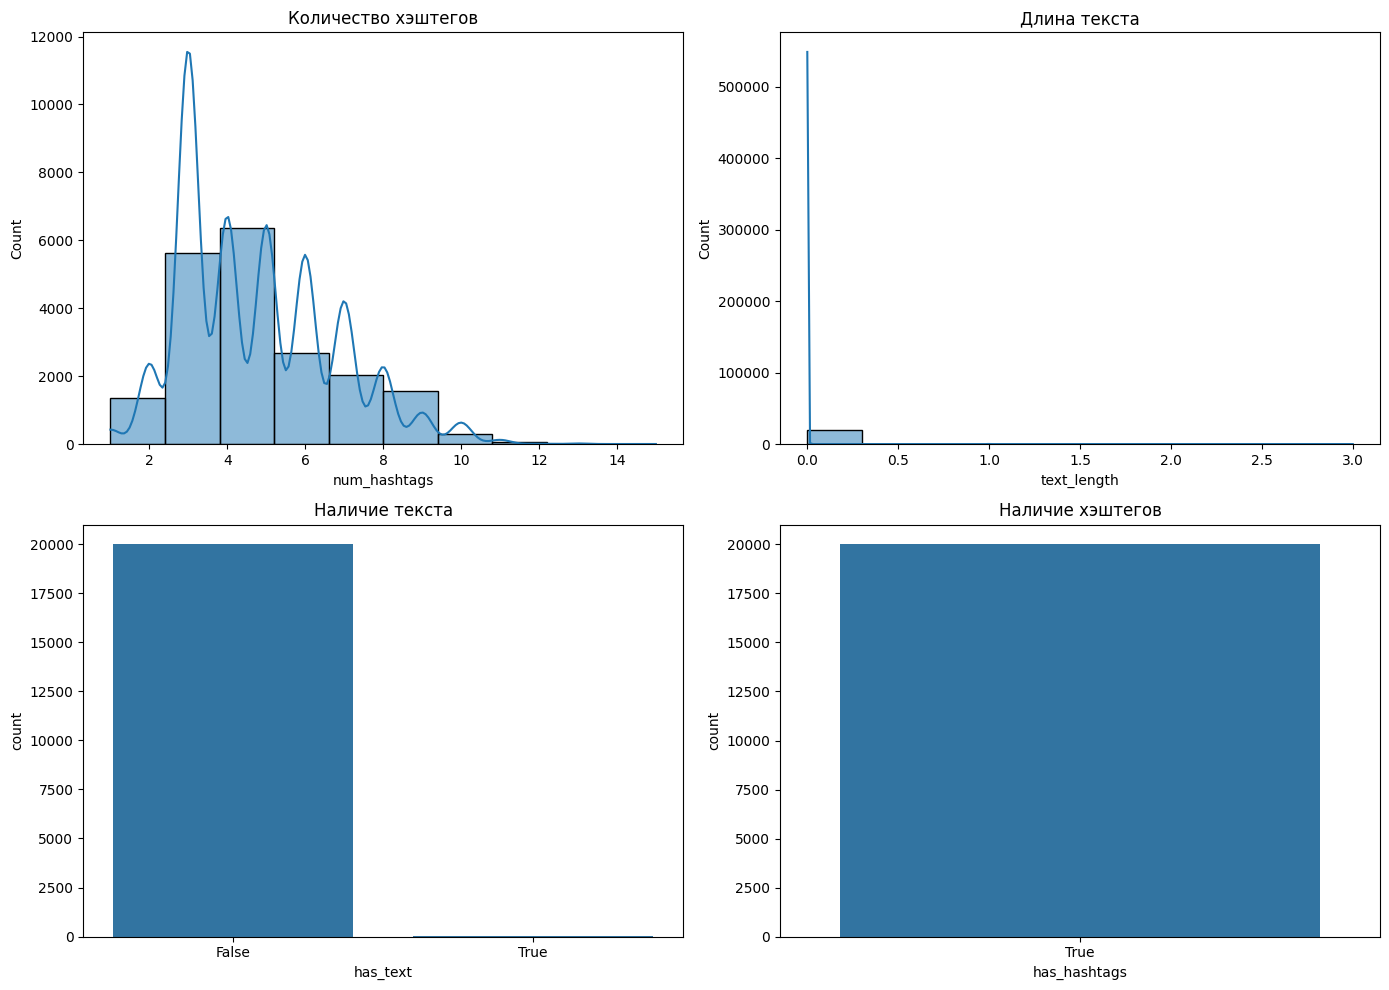

In [20]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['num_hashtags'], bins=10, kde=True)
plt.title('Количество хэштегов')

plt.subplot(2, 2, 2)
sns.histplot(df['text_length'], bins=10, kde=True)
plt.title('Длина текста')

plt.subplot(2, 2, 3)
sns.countplot(x='has_text', data=df)
plt.title('Наличие текста')

plt.subplot(2, 2, 4)
sns.countplot(x='has_hashtags', data=df)
plt.title('Наличие хэштегов')

plt.tight_layout()
plt.show()

In [21]:
all_tags = list(tag for sublist in df['hashtags'] for tag in sublist)

In [22]:
len(all_tags)

95150

In [23]:
unique_tags = set(all_tags)

In [24]:
len(unique_tags)

643

In [25]:
len(unique_tags) / len(all_tags)

0.006757750919600631

In [32]:
from collections import Counter


In [33]:
tag_counts = Counter(all_tags)

In [34]:
len(unique_tags)

632

In [35]:
tag_counts.most_common(15)

[('красивыедевушки', 20003),
 ('boobs', 12797),
 ('грудь', 11638),
 ('ass', 9581),
 ('попа', 7381),
 ('bigbooty', 4517),
 ('hotgirl', 2481),
 ('купальник', 2044),
 ('азиатки', 1926),
 ('бикини', 1696),
 ('танцы', 1469),
 ('lingerie', 1429),
 ('sexy', 872),
 ('sexygirls', 804),
 ('секси', 785)]

In [25]:
38798 + 37669 + 22795 + 18794

118056

In [36]:
import networkx as nx
from community import community_louvain

In [37]:
unique_tags = list(set(all_tags))

In [38]:
co_occurrence_matrix = np.zeros((len(unique_tags), len(unique_tags)))

In [39]:
tag_to_index = {tag: idx for idx, tag in enumerate(unique_tags)}

In [40]:
for tags in df['hashtags']:
    for i in range(len(tags)):
        for j in range(i + 1, len(tags)):
            idx_i = tag_to_index[tags[i]]
            idx_j = tag_to_index[tags[j]]
            co_occurrence_matrix[idx_i, idx_j] += 1
            co_occurrence_matrix[idx_j, idx_i] += 1

In [41]:
G = nx.from_numpy_array(co_occurrence_matrix)

In [42]:
partition = community_louvain.best_partition(G)

In [43]:
clusters = defaultdict(list)
for tag, cluster_id in partition.items():
    clusters[cluster_id].append(unique_tags[tag])

In [44]:
len(clusters)

19

In [45]:
for cluster_id, tags in clusters.items():
    print(f'Cluster {cluster_id}: {tags[:20]}')

Cluster 0: ['удивительное', 'интересное']
Cluster 1: ['getdressedwithme', 'чистказубов', 'азиато', 'смешное', 'ресницы', 'ass', 'dress', 'clap', 'животные', 'спортзал', 'платьясетка', 'тренировки', 'мода', 'барби', 'рубашка', 'технологии', 'аниме', 'фитнес', 'спорт', 'красивыйкомплект']
Cluster 2: ['туризм', 'journey', 'мотивация', 'путешествия']
Cluster 3: ['природа', 'бокс', 'Красивыедевушки', 'уходзасобой', 'красавица', 'хеллоуин', 'mercedes', 'гольфы', 'hongqi', 'детектор', 'когдаонсдругой', 'красота', 'фотоссесия', 'sport', 'тусовка', 'футбол', 'красивыеволосы', 'какумодели', 'бельё', 'прекраснаяулыбка']
Cluster 4: ['сексуальныеазиатки', 'сексуальные', 'красивыеазиатки', 'азитки']
Cluster 5: ['локоны', 'обзор', 'увлечениехобби', 'catgirl', 'sexyoutfit', 'сексуальныенаряды', 'нижнеебельё', 'cosplayergirl', 'аппарат', 'fitgirl', 'чулочки', 'глазки', 'красивоебельё', 'бедра', 'куппальник', 'горячиедевушки', 'prankgirls', 'звездныевойны', 'sweet', 'pov']
Cluster 6: ['милая', 'азитка',

In [37]:
df.shape

(181506, 8)

In [38]:
df.sample(15_000).to_csv('../data/20k_selected.csv', index=False)